<h2>K-Nearest Neighbors Algorithm in Iris flower data set</h2>
<br>
<p>Base source: <a href="https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php">w3resource Python Machine Learning: Scikit-learn</a></p>
<br>
On English Wikipedia KNN's page:
<br>
<p>
    In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.
</p>
<p>
    In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
</p>
<p>
    In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.
</p>

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
sns.set()

In [2]:
#data loading
iris = pd.read_csv('iris.csv').drop('Id', axis=1)
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


1. Write a Python program to split the iris dataset into its attributes (X) and labels (y). The X variable contains the first four columns (i.e. attributes) and y contains the labels of the dataset.

In [3]:
X = iris.iloc[:,:4]
y = iris[['Species']]
print(X.head(3))
print(y.head(3))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
       Species
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa


2. Write a Python program using Scikit-learn to split the iris dataset into 70% train data and 30% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Print both datasets.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [5]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [6]:
y_test.head()

,Species
73,Iris-versicolor
18,Iris-setosa
118,Iris-virginica
78,Iris-versicolor
76,Iris-versicolor


In [7]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(120, 4) (120, 1) (30, 4) (30, 1)


3. Write a Python program using Scikit-learn to convert Species columns in a numerical column of the iris dataframe. To encode this data map convert each value to a number. e.g. Iris-setosa:0, Iris-versicolor:1, and Iris-virginica:2. Now print the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Print both datasets.

In [8]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
iris.Species = le.fit_transform(iris.Species)
X, y = iris.iloc[:,:4], iris[['Species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.head(3))
print(y_test.head(3))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
101            5.8           2.7            5.1           1.9
134            6.1           2.6            5.6           1.4
84             5.4           3.0            4.5           1.5
     Species
90         1
120        2
21         0


4. Write a Python program using Scikit-learn to split the iris dataset into 70% train data and 30% test data. Out of total 150 records, the training set will contain 105 records and the test set contains 45 of those records. Predict the response for test dataset (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) using the K Nearest Neighbor Algorithm. Use 5 as number of neighbors.

In [9]:
#Exercise solution
iris = pd.read_csv("iris.csv")
#Drop id column
iris = iris.drop('Id',axis=1)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#Create KNN Classifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_hat = knn.predict(X_test)
print(y_hat)

Response for test dataset:
['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


5. Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and calculate the accuracy of the model using the K Nearest Neighbor Algorithm.

In [10]:
print("Accuracy of the model:")
print(knn.score(X_test, y_test))

Accuracy of the model:
0.9333333333333333


6. Write a Python program using Scikit-learn to split the iris dataset into 80% train data and 20% test data. Out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records. Train or fit the data into the model and using the K Nearest Neighbor Algorithm calculate the performance for different values of k.

In [11]:
for k in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"Score for k = {k} is {str(knn.score(X_test, y_test))}.")

Score for k = 1 is 0.9555555555555556.
Score for k = 2 is 0.9555555555555556.
Score for k = 3 is 0.9333333333333333.
Score for k = 4 is 0.9333333333333333.
Score for k = 5 is 0.9333333333333333.
Score for k = 6 is 0.9777777777777777.


7. Train or fit the data into the model and using the K Nearest Neighbor Algorithm and create a plot to present the performance for different values of k.

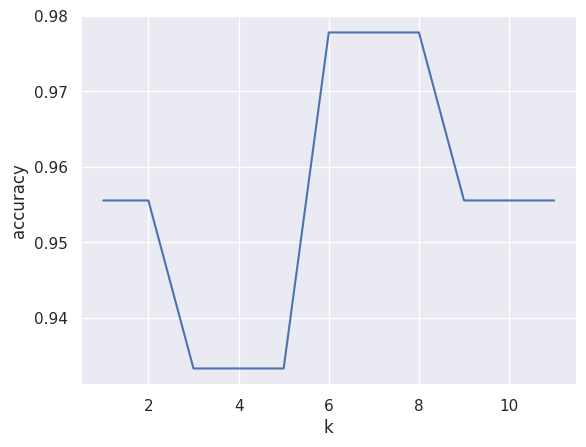

In [12]:
scores = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append((k, knn.score(X_test, y_test)))
axis = sns.lineplot(pd.DataFrame(scores, columns=['k', 'accuracy']),x='k', y='accuracy')

For k = 1 accuracy is 0.9555555555555556
For k = 2 accuracy is 0.9555555555555556
For k = 3 accuracy is 0.9333333333333333
For k = 4 accuracy is 0.9333333333333333
For k = 5 accuracy is 0.9333333333333333
For k = 6 accuracy is 0.9777777777777777
For k = 7 accuracy is 0.9777777777777777
For k = 8 accuracy is 0.9777777777777777
For k = 9 accuracy is 0.9555555555555556

Visual presentation: Various values of n for K-Nearest nerighbours:


/tmp/ipykernel_9544/2249741091.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
/tmp/ipykernel_9544/2249741091.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
/tmp/ipykernel_9544/2249741091.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
/tmp/ipykernel_9544/2249741091.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
/tmp/ipykernel_9544/2249741091.py:14: FutureWarning: The series.appen

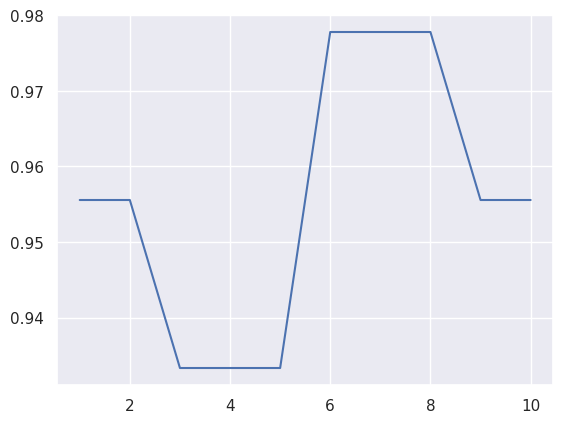

In [13]:
#Exercise solution
a_index=list(range(1,11))
a=pd.Series()
for i in np.arange(1, 10):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    print("For k = %d accuracy is"%i,knn2.score(X_test,y_test))
# Visual presentation: Various values of n for K-Nearest nerighbours
print("\nVisual presentation: Various values of n for K-Nearest nerighbours:")    
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)